# Regression

 지도 학습 알고리즘은 크게 <span style="color:blue">분류(Classification)</span>과 <span style="color:blue">회귀(Regression)</span>으로 나뉜다. 분류가 샘플을 몇 가지의 클래스 중 하나로 예측하는 문제라면, 회귀는 임의의 어떤 숫자를 예측하는 문제이다.<br>
 예를 들어 경제 성장률이나 배달 도착 시간 등이 회귀 문제라 볼 수 있다.

> 회귀는 19세기 통계학자 프랜시스 골턴(Fraincis Galton)이 처음 사용하였다. 키가 큰 사람의 아이가 부모보다 더 크지 않다는 사실을 관찰하여 ‘평균으로 회귀한다.’ 라고 푠현하였다. 그 후 <span style="color:green">두 변수 사이의 상관관계를 분석하는 방법</span>을 회귀라 불렀다.

## 1. K-최근접 이웃 회귀
 k-최근접 이웃 알고리즘이 회귀에도 작동한다. 우선 예측하려는 샘플에 가장 가까운 샘플 k개를 선택한다. 해당 샘플들의 클래스를 확인해 다수 클래스를 새로운 샘플의 클래스로 예측한다.
 k-최근접 이웃 회귀는 샘플들의 클래스를 참고하는 것이 아닌 임의의 수치를 참고한다. 예를 들어 샘플들의 타깃값이 각각 100, 80, 60이라면 평균값인 80을 예측값으로 한다

> 데이터는 http://bit.ly/perch_data 에서 가져온다.

In [118]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

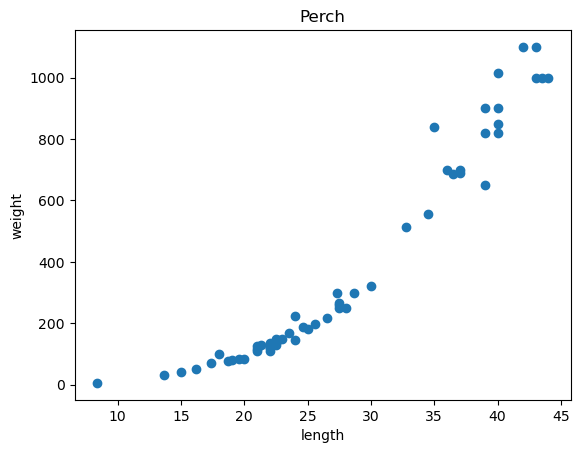

In [119]:
# 위 데이터의 산점도
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.title('Perch')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

 그래프에서는 무게가 길이에 비례하고 있다. 우린 이전처럼 농어 데이터를 훈련 세트와 테스트 세트로 나누어 훈련할 것이며, 일정한 결과값을 위해 random_state=42로 지정한다.<br>
 사이킷런에 사용할 훈련 세트는 2차원 배열이어야 하나, 여기서 농어의 길이와 무게 데이터는 모두 1차원 배열이다. 따라서 이를 통해 나눈 훈련 세트와 테스트 세트도 모두 1차원 배열이기 때문에 2차원 배열로 변환해줄 필요가 있다. <br>
 파이썬에서는 배열의 크기를 튜플로 나타내는데, 만약 원소가 한 개이면 (x, ) 와 같이 표현한다. numpy에 reshape()이라는 메서드로 형태를 변환할 것이다.다.

In [120]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
										perch_length, perch_weight, test_size=0.25, random_state=42)
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


 reshape 에서 -1은 정말 그 숫자를 말하는 것이 아니라 나머지 숫자를 맞춰 채우라는 의미이다.<br>
 이렇게 하면 쉽게 2차원 배열의 형태로 변환할 수 있다.

 사이킷런에서 K-최근접 이웃 회귀 알고리즘을 구현한 클래스는 KNeighborsRegressor이다.

In [121]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

knr.score(test_input, test_target)

0.992809406101064

 K-최근접 이웃 알고리즘의 점수는 샘플을 분류했을 때의 정확도이다. 다만 회귀는 결정계수(Coefficient of Determination)이라는 것으로 점수를 책정한다. 간단히 $R^2$라고도 부른다.

<p align="center"><img src='img/kneighbors_regressor.JPG' width='500'/></p>

$R^2$는 위의 식으로 표현할 수 있다.
 위는 타깃과 예측값의 차, 아래는 타깃과 평균값의 차이다. 결국 예측값이 평균값보다 타깃에 가까울 수록 점수는 올라가고, 멀어질 수록 점수는 낮아진다.

 사이킷런에서는 다양한 측정 도구를 제공하는데, 이 중에서 mean_absolute_error는 타깃과 예측의 절댓값 오차를 평균하여 반환한다.

In [122]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input) # 테스트 셋에 대한 예측
mae = mean_absolute_error(test_target, test_prediction) # 평균 절댓값 오차를 계산
mae

19.157142857142862

 예측이 평균 19g 정도 틀렸다는 것을 확인할 수 있다.

 그러면 훈련 세트에서의 점수는 어떨까?

In [123]:
knr.score(train_input, train_target)

0.9698823289099254

 위의 점수를 보면 이상한 것을 확인할 수 있다. 보통 테스트 세트의 점수보다 훈련 세트의 점수가 조금 더 높게 나온다. 훈련 세트에서 학습이 이루어졌기에 당연하다. 그럼에도 위에서는 테스트 세트의 점수가 더 높게 나왔다. 이 경우는 과소 적합이 이루어졌기 때문이다.

 우리는 이런 경우를 2가지로 나눈다.
 만약 훈련 세트의 점수가 좋았는데, 테스트 세트의 점수가 굉장히 나쁘다면 <span style="color:blue">**과대적합(overfitting)**</span>이 되었다고 할 수 있다. 같은 문제만 너무 푼 나머지 새로운 문제가 나오면 풀지 못하게 되는 것이다.
 또는 훈련 세트의 점수보다 테스트 세트의 점수가 높거나, 두 점수 모두 낮은 경우에는 <span style="color:blue">**과소적합(underfitting)**</span>이 되었다고 말한다. 이 경우 적절히 훈련되지 못하여 결과를 내지 못한다고 볼 수 있다.

>과소적합의 또 다른 원인은 훈련 세트와 테스트 세트의 크기가 너무 작기에 발생한다.

 그렇다면 앞선 모델에서는 과소적합이 되었다는 것을 알 수 있다. 방법은 모델을 좀 더 복잡하게 만드는 것이다. 이웃의 개수를 줄이면 훈련 세트에 있는 국지적 패턴에 민감해지고, 늘리면 데이터 전반의 일반적인 패턴을 따른다. 이웃의 default 값은 5이기에 3으로 낮추어보자. 있다.

In [124]:
knr.n_neighbors = 3
knr.fit(train_input, train_target)
knr.score(train_input, train_target)

0.9804899950518966

In [125]:
knr.score(test_input, test_target)

0.9746459963987609

 훈련 세트가 테스트 세트보다 점수가 조금 더 높게 나왔다. 하여 과소적합 문제가 해결되었다.
 다음은 참고 이웃의 개수에 따른 알고리즘의 복잡도를 표현한 것이다.

<p align="center"><img src='img/복잡도.png'></p>

## 2. 선형회귀 (Linear Regression)
 다만 K-최근접 이웃 모델의 한계를 다음 결과에서 확인할 수 있다.

In [126]:
knr.predict([[50]])

array([1033.33333333])

 실제 값은 훨씬 더 높아야함에도 1,033이라는 결과가 나왔다. 이유는 다음의 그래프에서 확인할 수 있다.

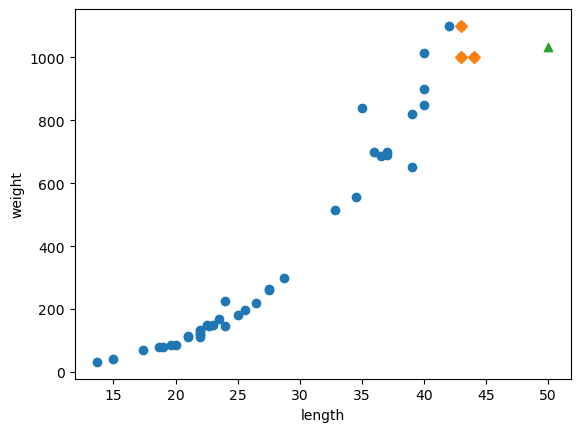

In [127]:
# 50cm 농어의 이웃을 구함
distances, indexes = knr.kneighbors([[50]])

# 산점도
plt.scatter(train_input, train_target)

# 훈련 세트 중 이웃 샘플만 다시 그림
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 50cm 농어
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

 예측하기 위해 입력한 샘플은 우리가 가지고 있는 데이터의 범위 바깥에 존재했던 것이다. K-최근접 이웃 모델은 가장 가까운 샘플들을 참고하기 때문에 그 범위 바깥을 벗어나면 오답이 나올 수밖에 없는 구조였던 것이다. 추측해보면 참고한 값들의 평균값이 위에서 예측한 값과 동일할 것이다.

1033.3333333333333

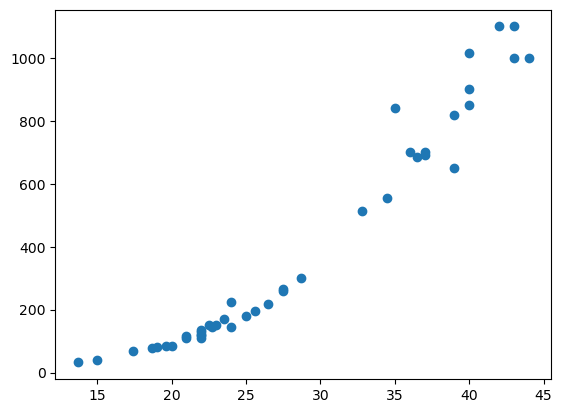

In [128]:
distances, indexes = knr.kneighbors([[50]])
plt.scatter(train_input, train_target)

np.mean(train_target[indexes])

In [129]:
knr.predict([[100]])

array([1033.33333333])

역시나 값이 일치한다. 이러면 아무리 큰 값을 넣어도 우리가 원하는 결과는 얻을 수 없다. 그러면 다른 알고리즘을 사용해야 한다.

 **선형 회귀(Linear Regression)**은 널리 사용되는 가장 대표적인 회귀 알고리즘이다. 선형이라는 말에서 알 수 있듯이 특성이 하나인 경우 어떤 직선을 학습하는 알고리즘이다.

 <p align="center"><img src='img/linear.png'></p>

 위의 세 그림 중 3번째 직선이 데이터와 가장 가깝다고 여길 것이다. 이렇게 가장 유사한 직선을 찾아 예측하는 것이 선형 회귀 알고리즘의 방식이다.

In [130]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)

lr.predict([[50]])

array([1241.83860323])

 K-최근접 이웃 알고리즘과 달리 값을 훨씬 높게 예측했다.

<p align="center"><img src='img/농어 그래프.png' width=450></p>

 그래프에서 하나의 직선은 $y = ax + b$처럼 표현할 수 있는데, x를 농어의 길이, y를 농어의 무게로 바꾸면 위의 그림과 같이 표현할 수 있다.
 LinearRegression 클래스에서 lr객체의 coef_와 intercept_속성에 a와 b 값이 저장되어 있다. 확인해보면 다음과 같다.

In [131]:
print(lr.coef_, lr.intercept_)
# coef_ 속성 이름에서 알 수 있듯 머신러닝 기울기를 종종 계수(coefficient) 또는 가중치(weight)라 부른다.

[39.01714496] -709.0186449535477


> coef_와 intercept_를 머신러닝이 찾은 값이라는 의미로 모델 파라미터(model parameter)라고 부른다. 머신러닝 알고리즘의 훈련 과정은 최적의 모델 파라미터를 찾는 것과 같다. 이를 모델 기반 학습이라 부르며, 앞에서 사용한 K-최근접 이웃에는 모델 파라미터가 없다.
 훈련 세트를 저장하는 것이 훈련의 전부였고, 이를 사례 기반 학습이라고 부른다.

 우리는 앞서 구한 속성을 통해 15에서 50까지 직선을 구해보자.

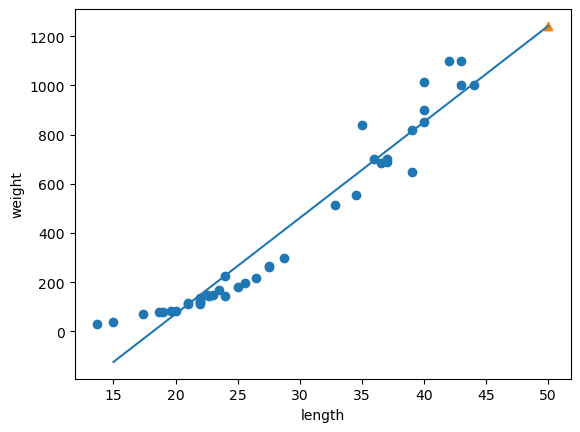

In [132]:
plt.scatter(train_input, train_target)

# 15~50까지의 1차 방정식 그래프
plt.plot([15, 50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_])

# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [133]:
lr.score(train_input, train_target)

0.939846333997604

In [134]:
lr.score(test_input, test_target)

0.8247503123313558

 훈련 세트와 테스트 세트의 점수가 차이가 좀 난다. 과대적합이 되었다기엔 큰 차이는 아니지만, 완벽히 학습했다기엔 부족함이 느껴진다. 어째서일까? 그래프의 좌측 하단을 살펴보면 직선과 데이터의 방향이 조금 어긋나는 것을 볼 수 있다. 이건 직선 그래프의 한계 때문이다.

## 2-1. 다항회귀
 우리가 보다 데이터셋에 유사한 형태를 띄기 위해선 2차 방정식의 그래프가 필요해 보인다.

 <p align="center"><img src='img/농어 무게.png' width=450></p>

  그림으로 보면 확실히 이전보다 데이터셋과 유사해보인다. 그렇다면 $y = ax^2 + bx + c$의 그래프를 그리기 때문에 $x^2$의 새로운 훈련 세트를 추가해야 한다. 원래 훈련 세트에 column_stack() 함수를 사용하면 간단히 해결할 수 있다.

In [135]:
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


 원래 특성 중 길이를 제곱하여 추가했기에 데이터가 모두 2열로 늘어났다. <br>
 이 값으로 다시 훈련을 진행하면 2차 방정식의 파라미터인 a, b, c를 찾아낼 것이다. 다만 훈련 세트는 달라졌지만 타깃값은 동일하게 사용한다. 입력값을 달리했을 뿐이지 목표가 되는 값이 달라진 것은 아니기 때문이다.

In [136]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)

lr.predict([[50**2, 50]]) # 더 높은 값 예측

array([1573.98423528])

In [137]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278304


$weight = 1.01 × length^2 - 21.6 × length + 116.05$ 라는 방정식을 학습한 것이다.

 다시 한 번 그래프를 그려보면 다음과 같다.

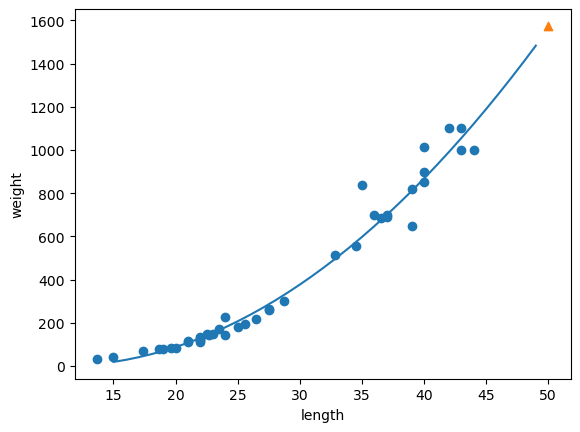

In [138]:
# 그래프를 그리기 위해 15~49까지 정수 배열 생성
point = np.arange(15, 50)

plt.scatter(train_input, train_target)

plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

plt.scatter(50, 1574, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

 확실히 비교해보면 무게가 음수가 나올 일도 없고, 데이터셋에도 훨씬 잘 맞는다는 것을 알 수 있다. 여기서 사용된 방정식을 다항식(polynomial)이라 하며, 선형 회귀를 <span style="color:blue">다항 회귀(Polynomial Regression)</span>이라 부른다. 

In [139]:
lr.score(train_poly, train_target)

0.9706807451768623

In [140]:
lr.score(test_poly, test_target)

0.9775935108325122

 점수가 훨씬 좋아졌으나, 테스트 세트의 점수가 조금 더 높은 것을 보아 과소적합이 작게 남아있다.

## 3. 다중 회귀 (Multiple Regression)
 과소적합을 해결하기 위해선 모델을 더 복잡하게 만들 필요가 있다. 그렇다면 제곱보다 더 고차항을 넣거나, 특성을 늘리는 방법도 있다.<br>
 우리는 여러 개의 특성을 사용할 것인데 이를<span style="color:blue"> 다중 회귀(multiple regression</span>)이라 한다. 혹은 다항 회귀(multinomial regression)이라고도 한다<br>.
 특성이 1개일 땐 선을 학습하였다. 특성이 2개라면 평면을 학습하게 될 것이다.

<p align="center"><img src='img/다중 회귀.png' width=600></p>

 오른쪽 그림처럼 특성이 2개라면 3차원 공간을 형성, $target = a × feature_1 + b × feature_2 + c$ 형태의 평면을 이룰 것이다. 특성이 3개 이상이라면 우리가 상상하기엔 한계가 있겠지만 훨씬 복잡한 모델이 되리라는 것을 알 수 있다.<br>
 특성으로 높이 뿐 아니라 길이와 두께도 함께 채택하자. 또한 이전처럼 3개의 특성을 각각 제곱하고, 각 특성을 서로 곱하여 길이*높이 와 같이 새로운 특성을 만들 것이다. 이렇게 기존 특성으로 새로운 특성을 만들어내는 작업을 특성 공학(feature engineering)이라 한다.

In [141]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
train_input, test_input, train_target, test_target = train_test_split( 
		perch_full, perch_weight, random_state=42) # 이 데이터를 통해 새로운 특성 생성

 이 데이터를 사용해 우리는 새로운 특성을 만들 것이다.

 사이킷런은 특성을 만들거나 전처리 하기 위해 다양한 클래스를 제공하는데, 이런 클래스들을 변환기(transformer)라고 한다.<br>
 모델 클래스에 일관된 fit(), score(), predict() 메서드가 있는 것처럼 변환기 클래스에도 모두 fit(), transform() 메서드를 제공한다.<br>
 우리가 사용할 변환기는 PolynomialFeatures 클래스이다.다.

In [142]:
from sklearn.preprocessing import PolynomialFeatures

# degree = 2( default )
# 제곱수를 의미하며, 3으로 두면 3제곱도 특성으로 선택함
poly = PolynomialFeatures()

# 1(bias), 2, 3, 2**2, 2*3, 3**2
poly.fit([[2, 3]])

poly.transform([[2, 3]])

array([[1., 2., 3., 4., 6., 9.]])

PolynomialFeatures() 클래스는 입력하는 리스트의 제곱과 특성끼리 곱해서 새로운 특성을 만들어준다. 예를 들어 $[[x0, x1]]$ 을 넣으면 $[[1, x0, x0^2, x1,x1^2, x0*x1]]$ 과 같이 출력을 내준다.<br>
 이 때 degree라는 인자가 있는데 default 값이 2로, 제곱수를 의미한다. 만약 3을 넣으면 3제곱까지 새로운 특성을 만들어줄 것이다.

→ 출력에서 1은 절편을 의미한다. $weight = a*length+b*height+c*width+d*1$에 있는 1을 절편(bias)로 넣는 것이다. 만약 1을 없애고 싶다면 include_bias=False 로 지정해줘야 

>사이킷런 모델은 자동으로 특성에 추가된 절편 항을 무시해준다. 하지만 우리는 혼돈을 피하기 위해 명시적으로 지정한다.한다.

In [143]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

train_poly.shape

(42, 9)

 $[height, height^2, weight, weight^2, width, width^2, height*weight, height*width, weight*width]$ 로 특성은 9개, 샘플은 42개로 shape과 일치한다.
 아니면 내장된 메서드로 확인해보는 방법도 있다.

In [144]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [145]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)

lr.score(train_poly, train_target), lr.score(test_poly, test_target)

(0.9903183436982124, 0.9714559911594203)

 확실히 과소적합이 해결되었다.

 만약 특성을 더 추가한다면 어떻게 될까?

In [147]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

train_poly.shape

(42, 55)

In [148]:
lr.fit(train_poly, train_target)

lr.score(train_poly, train_target), lr.score(test_poly, test_target)

(0.999999999997515, -144.40196592191958)

 매우 심한 과대적합이 이루어졌다. 샘플이 42개인데 특성이 55개라면 완벽한 학습이 될 수 있을 것이다. 다만 본 것처럼 테스트세트에서 음수가 나올 정도로 매우 심한 과대적합이 이루어지게 된 것이다.

## 4. 규제 (Regularization)

 규제(Regularization)이란 과도한 학습을 막도록 훼방하는 역할을 한다. 즉 과대적합을 막는다. 선형 회귀 모델의 경우 계수(또는 기울기)의 크기를 작게 만드는 것이다.

<p align="center"><img src='img/규제.png' width=800></p>

 위의 그림처럼 규제를 걸 경우 기울기가 줄어들어 보편적인 패턴을 학습한다. 계수값의 크기가 많이 다르면 규제를 적용할 때도 다르게 적용이 된다.

In [149]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler() # 특성 -> 표준점수 변환기
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)
# 평균 ss.mean_ 표준편차 ss.scale_ 속성에 저장

### 4-1. 릿지 회귀
선형 회귀 모델에서 규제를 추가한 모델을 **릿지(ridge)**와 **라쏘(lasso)**라 부른다. 둘의 차이를 비교해보자면,

1. 릿지는 계수를 제곱한 값을 기준으로 규제를 적용
2. 라쏘는 계수의 절댓값을 기준으로 규제를 적용

 일반적으로는 릿지를 조금 더 선호한다. 라쏘의 경우 계수의 크기를 아예 0으로 만들어버리는 우려가 존재한다. 다음이 바로 릿지의 예시라고 보면 된다.

<p align="center"><img src='img/ridge.png' width=400></p>

알파의 값에 따라 규제가 강화되는데, 곡선의 기울기가 점차 줄어드는 것을 알 수 있다.

In [150]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)

ridge.score(train_scaled, train_target), ridge.score(test_scaled, test_target)

(0.9896101671037343, 0.9790693977615386)

훈련 세트에 대한 점수는 조금 낮아졌으나, 과대적합의 문제는 해결되었다. 확실히 55개나 되는 특성을 사용했는데도 규제를 함으로써 괜찮은 성능을 내고 있다.

 릿지와 라쏘를 사용할 때 규제의 양을 임의로 조절하는 것이 가능하다. 모델 객체를 생성할 때 alpha 매개변수로 강도를 조절하는데,

- alpha ↑ 는 규제 강도 ↑
- alpha ↓ 는 규제 강도 ↓
- alpha 가 작아져 계수가 너무 낮아지면 일반 선형 회귀 모델과 유사해지므로 과대적합 될 

>  alpha 값은 릿지 모델이 학습하는 값이 아닌, 우리가 사전에 지정해야 하는 값이다.
 이렇게 모델이 학습할 수 없고 사람이 알려줘야 하는 파라미터를<span style="color:blue"> 하이퍼파라미터(hyperparameter</span>)라고 한다. 머신러닝 라이브러리에서 하이퍼파라미터는 클래스와 메서드의 매개변수로 표현된다

 적절한 alpha 값을 찾는 방법은 alpha에 대한 $R^2$의 그래프를 그려보는 것이다. 훈련 세트와 테스트 세트의 점수가 가장 가까운 시점이 최적의 alpha 값이 된다..가능성이 ↑

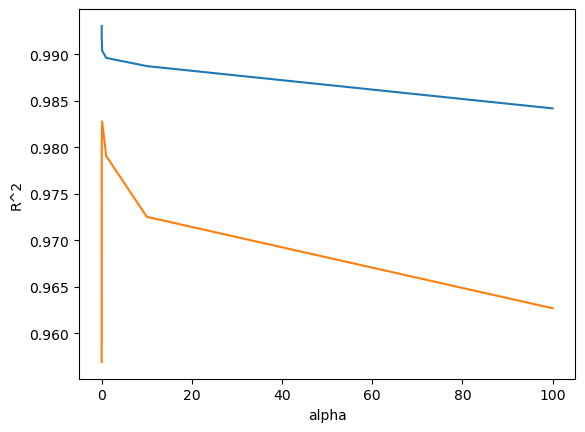

In [151]:
import matplotlib.pyplot as plt

train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list: # alpha 값 별로 릿지 모델을 생성, 훈련 & 테스트 점수 저장
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))
    
plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

 다만 X축에 alpha_list를 넣어버리니 0과 1사이에 너무 많은 값이 몰린 것을 확인되었다. 그렇다면 $log$를 취해 정규화시키자.

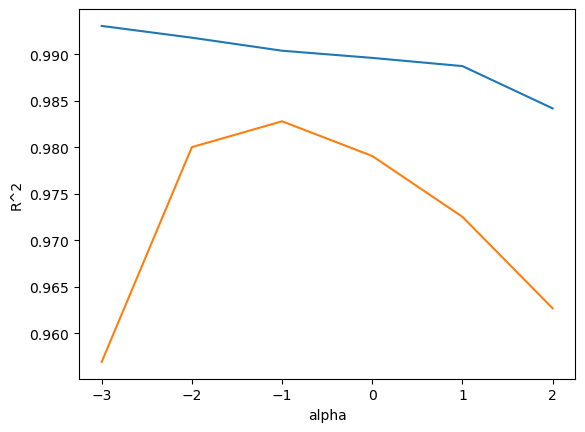

In [152]:
alpha_log = np.log10(alpha_list)
plt.plot(alpha_log, train_score)
plt.plot(alpha_log, test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

 보다 정상적인 그래프가 출력되었다. 파란색이 훈련 세트 그래프, 주황색이 테스트 세트 그래프이다.  훈련 세트는 점차 점수가 낮아지고, 테스트 세트는 기하급수적으로 올랐다가 훈련 세트와 같이 낮아진다. 그러면 훈련 세트와 테스트 세트의 차이가 가장 적은 0.1을 채택하여 훈련해보자.

In [153]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

ridge.score(train_scaled, train_target), ridge.score(test_scaled, test_target)

(0.9903815817570367, 0.9827976465386894)

 상당히 좋은 점수가 나온다.

### 4-2. 라쏘 회귀 (Lasso)
 라쏘 또한 릿지와 매우 유사하다.

In [154]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)

lasso.score(train_scaled, train_target), lasso.score(test_scaled, test_target)

(0.989789897208096, 0.9800593698421886)

C:\Users\hsmin\anaconda3\envs\upstage\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\hsmin\anaconda3\envs\upstage\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


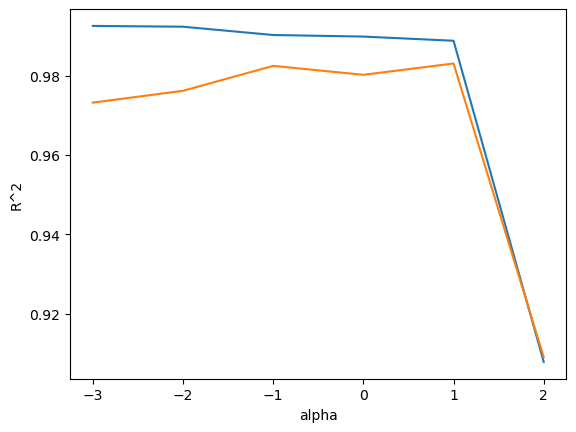

In [155]:
# alpha 매개변수 또한 릿지와 동일하게 그래프를 통해 확인해볼 수 있다.
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

alpha_log = np.log10(alpha_list)
plt.plot(alpha_log, train_score)
plt.plot(alpha_log, test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()  

훈련 & 테스트 세트의 차가 가장 적은 지점의 alpha 값은 1, 즉 $10^1 = 10$이다.

>ConvergenceWarning : 라쏘 모델이 최적의 계수를 찾기 위해 반복 계산을 수행하는데, 지정한 반복횟수가 부족할 때 발생<br>
 이를 충분히 늘리기 위해 max_iter 매개변수의 값을 10000으로 지정. 필요 시 더 증가시킬 수 있지만 이 문제에서는 큰 영향을 주지 않는다.

In [156]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

lasso.score(train_scaled, train_target), lasso.score(test_scaled, test_target)

(0.9888067471131867, 0.9824470598706695)

 특성을 많이 사용했음에도 매우 잘 훈련되었다.
 앞서 라쏘 모델은 계수를 아예 0으로 만들 수 있다 하였는데, 몇 개의 계수가 0인지 확인해보자.

In [157]:
np.sum(lasso.coef_ == 0)

40

 55개 중 40개나 계수가 0이 되었음을 확인할 수 있다. 결국 실제로 사용한 특성은 15개밖에 되지 않는다는 뜻이다. 이런 특징 때문에 라쏘 모델은 유용한 특성을 골라내는 용도로도 사용할 수 있다.

In [158]:
lasso.coef_

array([ 0.        ,  0.        ,  0.        , 12.14852453, 55.44856399,
       42.23100799,  0.        ,  0.        , 13.70596191,  0.        ,
       43.2185952 ,  5.7033775 , 47.46254536,  7.42309425, 11.85823365,
        0.        ,  0.        , 13.53038193, 21.22111356,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       18.66993032,  0.        ,  0.        ,  0.        , 15.81041778,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , 18.14672268,
        0.        ,  0.        ,  0.        ,  0.        , 15.51272953,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])